In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('../Data/1645792390_cep1_dataset.xlsx')
df = pd.DataFrame(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns = ['age', 'sex', 'cp', 'restbps', 'chol', 'fast_bsug', 'rest_ecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [5]:
# From the unique value table
num_var = ['age', 'restbps', 'chol', 'thalach', 'oldpeak']
cat_var = ['sex', 'cp', 'fast_bsug', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [6]:
cat_axis_name = ["Gender", "Chest Pain", "Fasting Blood Sugar", "resting ECG", "Exercise induced Angina", "Slope of ST Segment", "Number of Blood Vessels", "Thal", "Target"]

In [7]:
list(zip(cat_var, cat_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain'),
 ('fast_bsug', 'Fasting Blood Sugar'),
 ('rest_ecg', 'resting ECG'),
 ('exang', 'Exercise induced Angina'),
 ('slope', 'Slope of ST Segment'),
 ('ca', 'Number of Blood Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [8]:
list(df['cp'].value_counts())

[143, 87, 50, 23]

In [9]:
list(df['cp'].value_counts().index)

[0, 2, 1, 3]

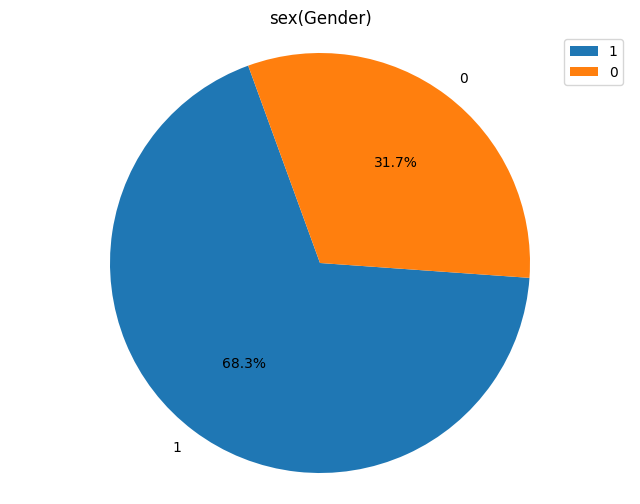

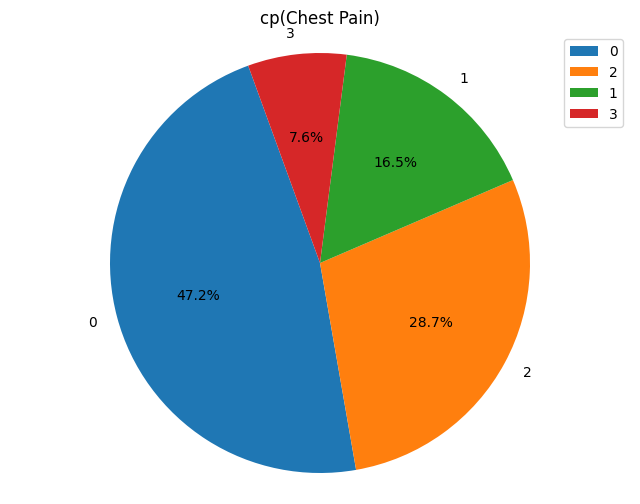

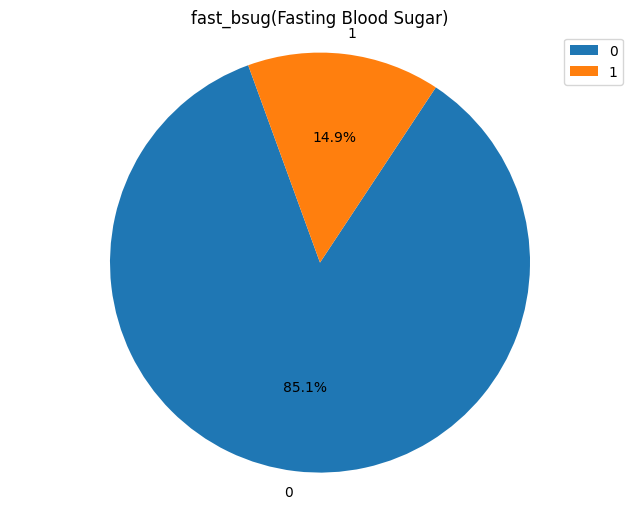

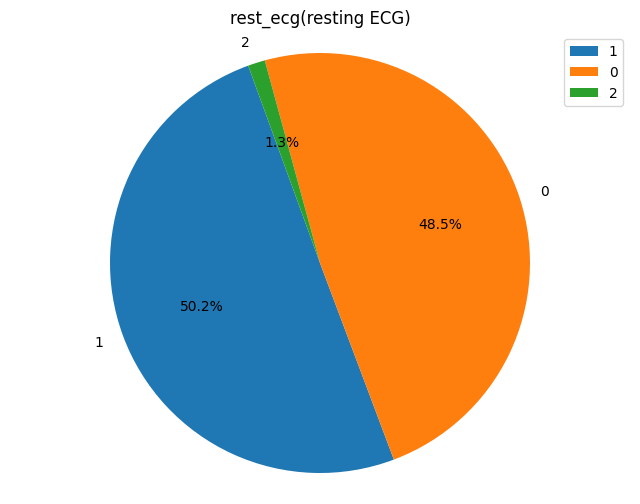

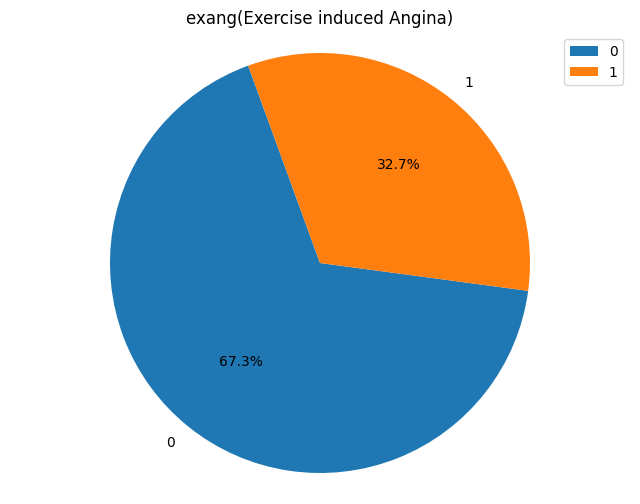

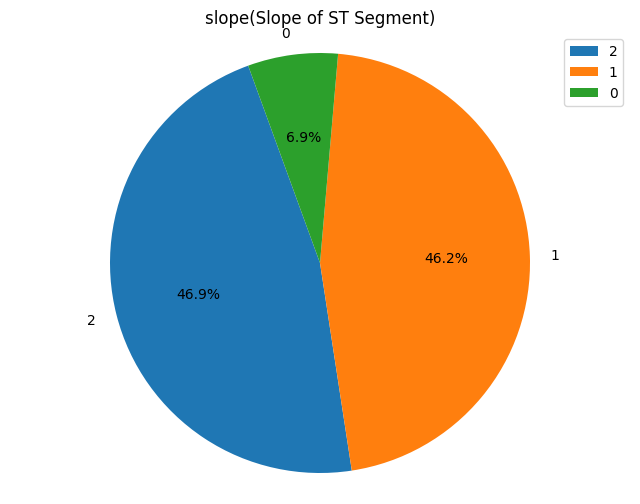

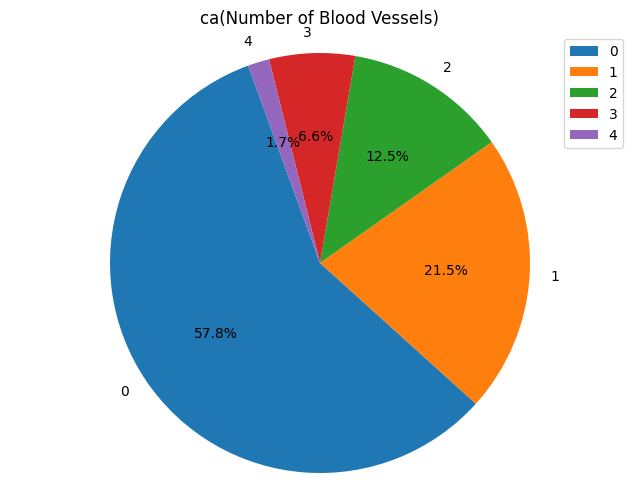

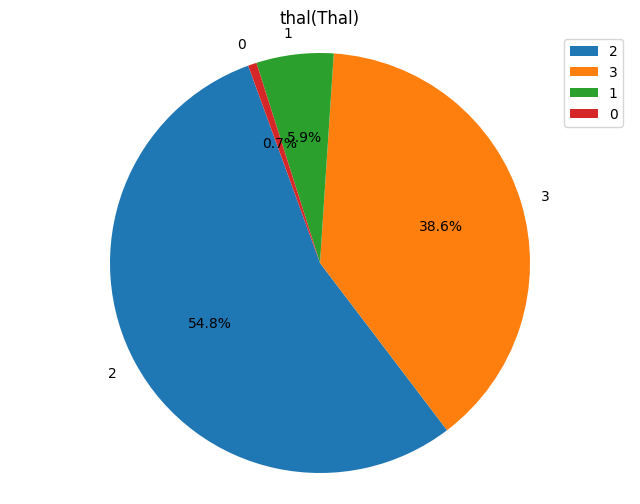

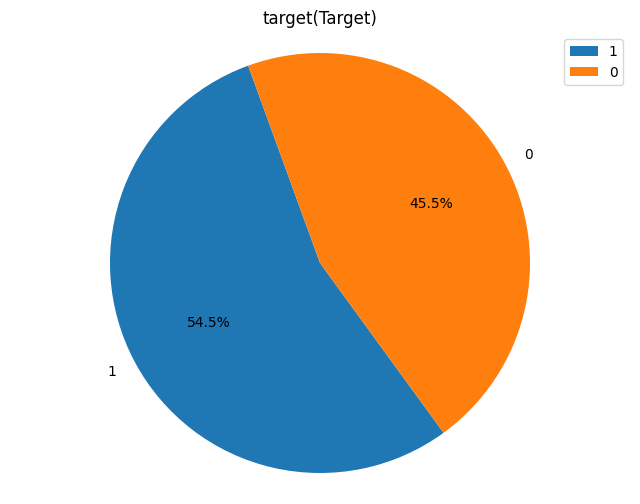

In [14]:
for i, z in list(zip(cat_var, cat_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 6))
    oberv_val = list(df[i].value_counts().index)
    tot_obs_val = list(df[i].value_counts())
    ax.pie(tot_obs_val, labels=oberv_val, autopct = '%1.1f%%',startangle=110, labeldistance=1.1)
    ax.axis("equal")
    plt.title(i + "(" + z + ")")
    plt.legend()

In [15]:
df.loc[df['thal'] == 0]

,age,sex,cp,restbps,chol,fast_bsug,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [18]:
df["thal"] = df["thal"].replace(0, np.nan)

In [19]:
df.loc[[48, 281], :]

,age,sex,cp,restbps,chol,fast_bsug,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [20]:
df['thal'].fillna(df["thal"].median(), inplace=True)

In [21]:
df.loc[[48, 281], :]

,age,sex,cp,restbps,chol,fast_bsug,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


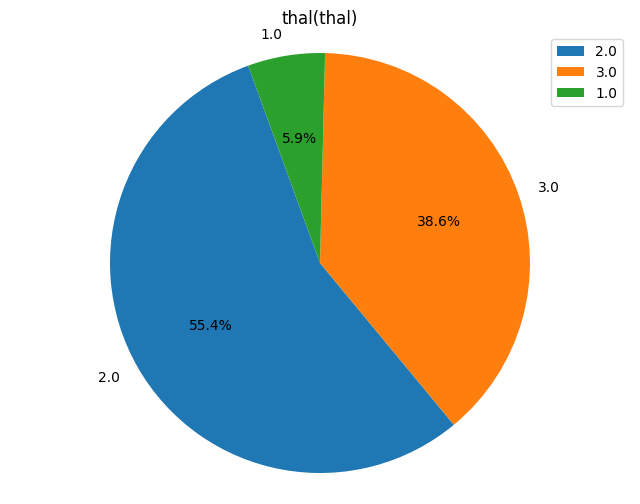

In [22]:

fig, ax = plt.subplots(figsize = (8, 6))
oberv_val = list(df['thal'].value_counts().index)
tot_obs_val = list(df['thal'].value_counts())
ax.pie(tot_obs_val, labels=oberv_val, autopct = '%1.1f%%',startangle=110, labeldistance=1.1)
ax.axis("equal")
plt.title('thal' + "(thal)")
plt.legend()

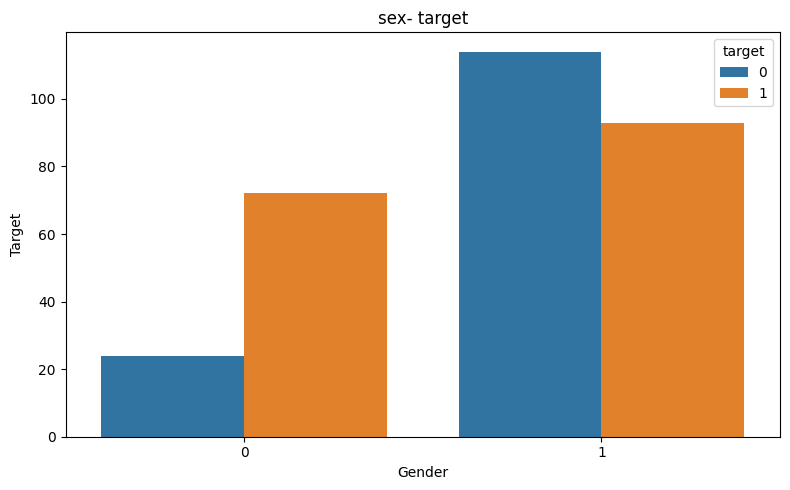

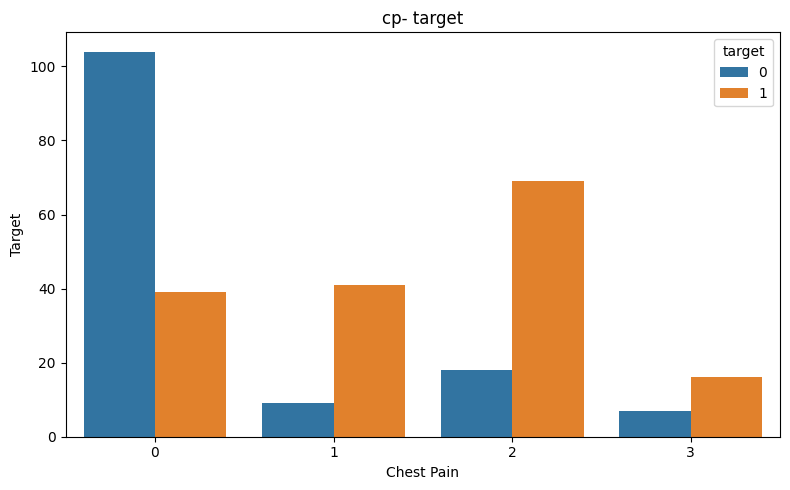

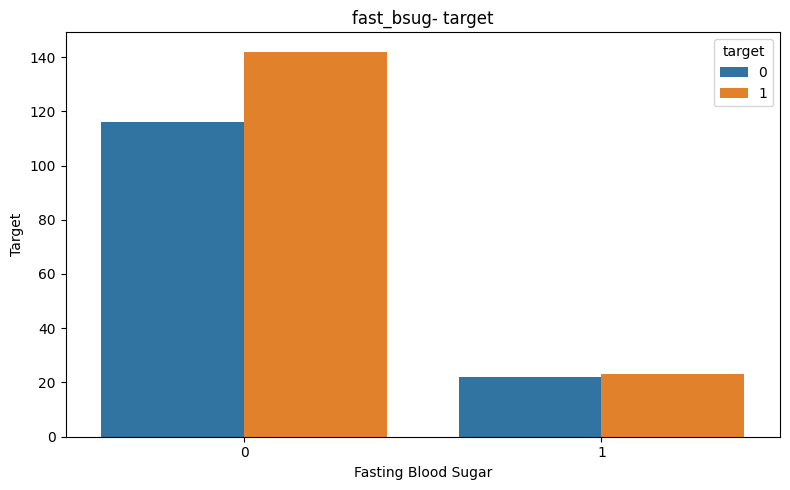

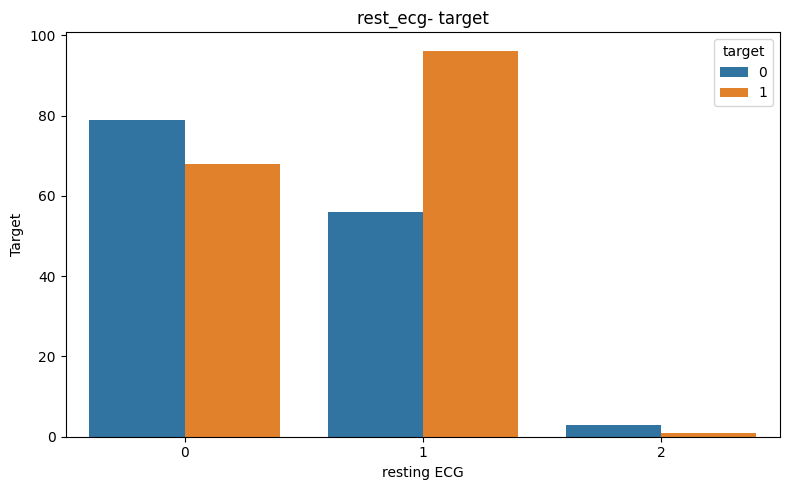

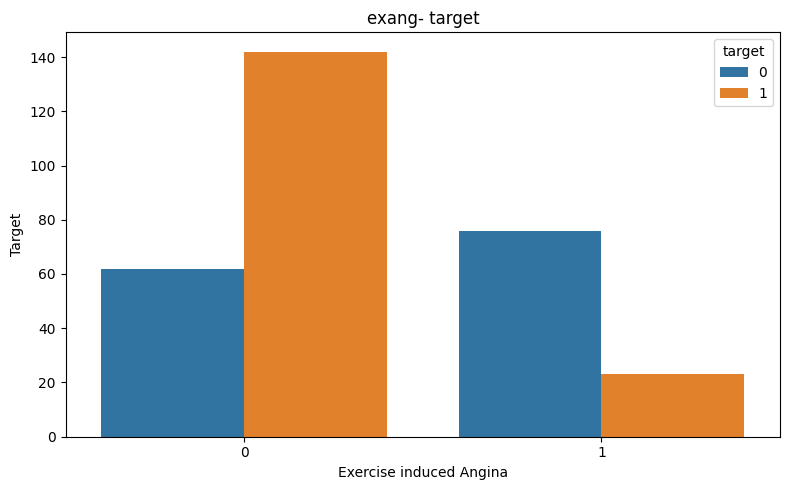

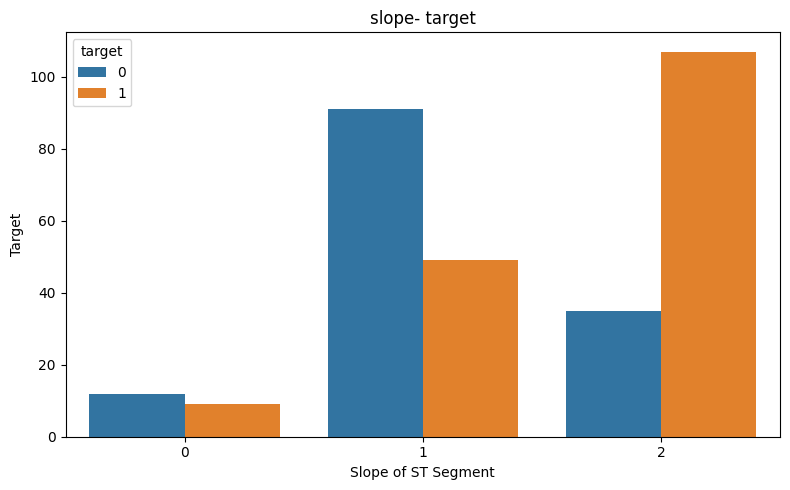

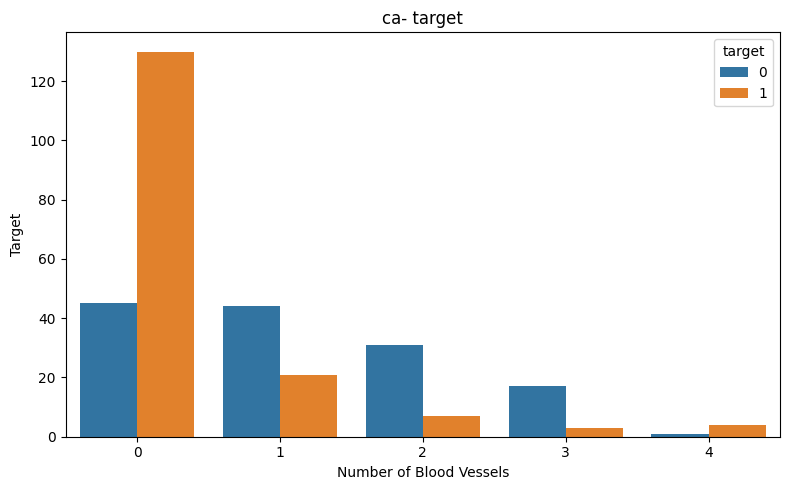

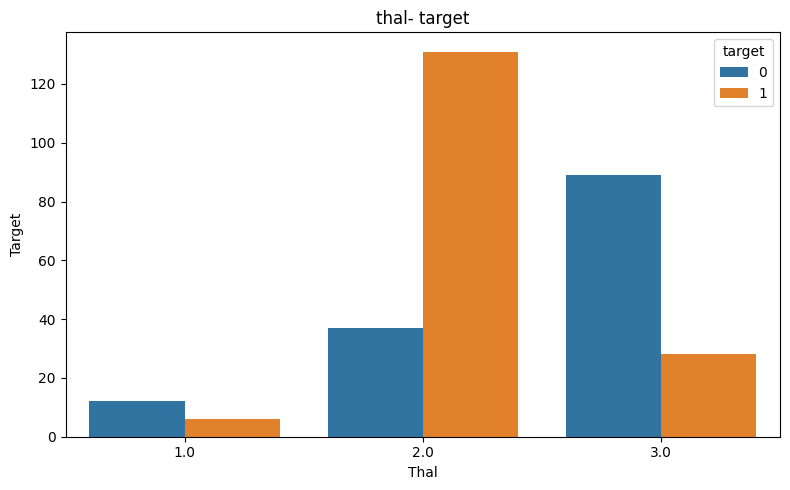

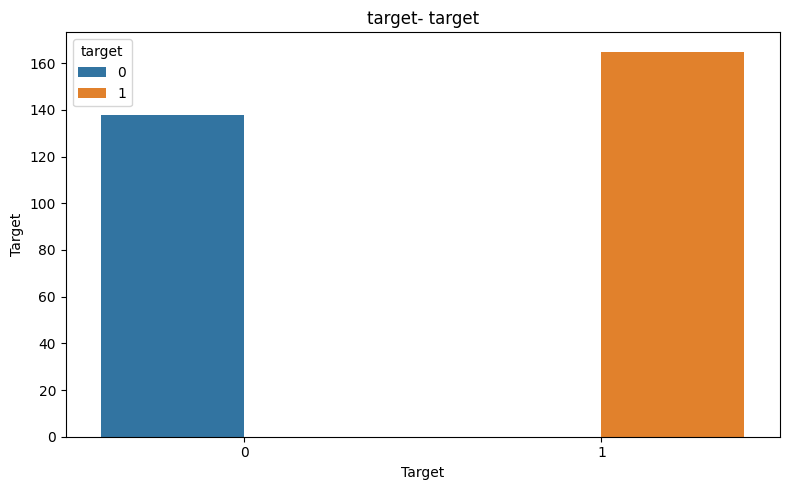

In [28]:
for i, z in list(zip(cat_var, cat_axis_name)):
    plt.figure(figsize=(8, 5))
    sns.countplot(x = i, data=df[cat_var], hue='target')

    
    plt.title(i + '- target')
    plt.xlabel(z)
    plt.ylabel("Target")

    plt.tight_layout()
    plt.show()

### catagorical variable analysis
* age -- men more likely to have heart attack 
* Chest pain -- 0 symtomless pain, less likely; 1 pain with physical activity, 2 shortness of breath: risk 3 times higher; 3 cp not caused by CVD twice as high
* 0: < 120mg/dl, 1: > 120mg/dl;  0 slightly higher risk, 1 nearly equal risk
* 1 abnormal resting ECG twice likely to have heart attack
* 1 exercise related pain much less likely to have heart attack; 0 do not have pain exercising, higher risk
* Slope of ST: 2 postive ST slope, 3 times more likely to have a heart  attack, 1 flat slope twice likely to not  have heart attack.
* Number of veins (ca): 0 veins three times more likely to have heart attack
* Thal stress test: 2 three times more likely to have a heart attack

In [29]:
df[cat_var].corr()

,sex,cp,fast_bsug,rest_ecg,exang,slope,ca,thal,target
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fast_bsug,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757
slope,-0.030711,0.119717,-0.059894,0.093045,-0.257748,1.000000,-0.080155,-0.106310,0.345877
ca,0.118261,-0.181053,0.137979,-0.072042,0.115739,-0.080155,1.000000,0.143248,-0.391724
thal,0.211652,-0.169125,-0.011209,-0.013795,0.225508,-0.106310,0.143248,1.000000,-0.363322
target,-0.280937,0.433798,-0.028046,0.137230,-0.436757,0.345877,-0.391724,-0.363322,1.000000


In [30]:
df[cat_var].corr().iloc[:,  [-1]]

,target
sex,-0.280937
cp,0.433798
fast_bsug,-0.028046
rest_ecg,0.137230
exang,-0.436757
slope,0.345877
ca,-0.391724
thal,-0.363322
target,1.000000
